Do the following on the dataset
1. Load the data into the pandas environment and identify some basic details of the
dataset.
2. Reset the index as "name".
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10.Do the standard scaling on the feature performance score.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load the data into the pandas environment and identify some basic details of the dataset

In [2]:
data=pd.read_csv('employee.csv')
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [3]:
data.shape

(9, 7)

In [4]:
data.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

In [5]:
data.dtypes

name                  object
age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [6]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [7]:
data.describe(include='object')

,name,gender,department,grade
count,9,7,9,9
unique,9,2,3,4
top,Allen Smith,F,Operations,G3
freq,1,5,3,5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [9]:
data.nunique()

name                 9
age                  5
income               7
gender               2
department           3
grade                4
performance_score    9
dtype: int64

In [10]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

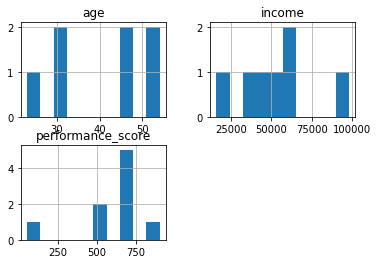

<Figure size 720x720 with 0 Axes>

In [11]:
data.hist()
plt.figure(figsize=(10,10))
plt.tight_layout()
plt.show()

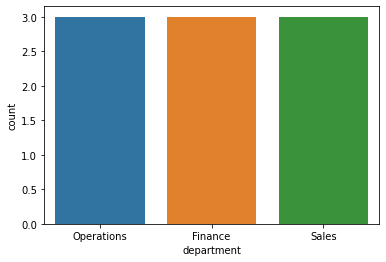

In [12]:
sns.countplot(data=data,x='department')
plt.show()

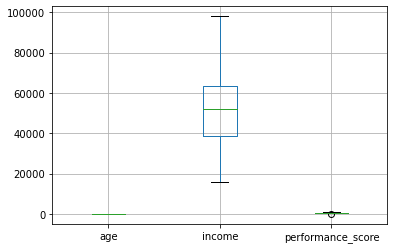

In [13]:
data.boxplot()
plt.show()

<AxesSubplot:xlabel='grade', ylabel='count'>

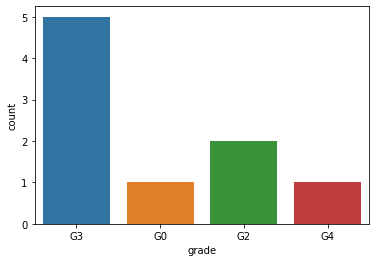

In [14]:
sns.countplot(data['grade'])

## Reset the index as "name".

In [15]:
df=data.set_index('name')
df.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [16]:
df.shape

(9, 6)

## Select rows for specific names Jack Morgan and Josh wills.

In [17]:
df.loc[['Jack Morgan','Josh Wills'],:]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


## Select data for multiple values "Sales" and “Finance”.

In [18]:
df[(df['department']=='Finance')|(df['department']=='Sales')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## Display employee who has more than 700 performance score.

In [19]:
df[(df['performance_score']>700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## Display employee who has more than 500 and less than 700 performance score

In [20]:
df[(df['performance_score']>500)&(df['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


## Check and handle missing values in the dataset.

In [21]:
df.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

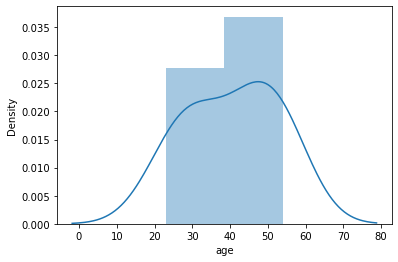

In [22]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='income', ylabel='Density'>

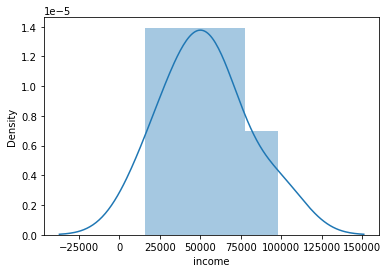

In [23]:
sns.distplot(df['income'])

it is normally distributed so can proceed with mean to fill the null values in age and income

In [24]:
#handling missing values for 'age' & 'income'
for i in['age','income']:
    df[i]=df[i].fillna(df[i].mean())
    
#handling missing values for 'gender'
df['gender']=df['gender'].fillna(df['gender'].mode()[0])

In [25]:
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

In [26]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52857.142857,F,Operations,G3,723
S Kumar,40.428571,16000.000000,F,Finance,G0,520
Jack Morgan,32.000000,35000.000000,M,Finance,G2,674
Ying Chin,45.000000,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,711
Satyam Sharma,40.428571,62000.000000,F,Sales,G3,649
James Authur,54.000000,52857.142857,F,Operations,G3,53
Josh Wills,54.000000,52000.000000,F,Finance,G3,901
Leo Duck,23.000000,98000.000000,M,Sales,G4,709


## Check the outliers and handle outliers in performance score using Percentiles.

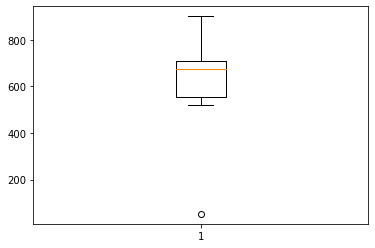

In [27]:
plt.boxplot(df['performance_score'])
plt.show()

In [28]:
#calculating interquartile range(IQR)
q1=np.percentile(df['performance_score'],25,interpolation='midpoint')
q2=np.percentile(df['performance_score'],50,interpolation='midpoint')
q3=np.percentile(df['performance_score'],75,interpolation='midpoint')
IQR=q3-q1
low_lim=q1-(1.5*IQR)
up_lim=q3+(1.5*IQR)
print('Lower limit : ',low_lim)
print('Upper limit : ',up_lim)

Lower limit :  323.5
Upper limit :  943.5


In [29]:
outlier=[]
for x in df['performance_score']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[53]

In [30]:
#finding the index of the outlier
out_idx=df['performance_score']<low_lim
df.loc[out_idx].index

Index(['James Authur'], dtype='object', name='name')

In [31]:
df.drop(['James Authur'],inplace=True)

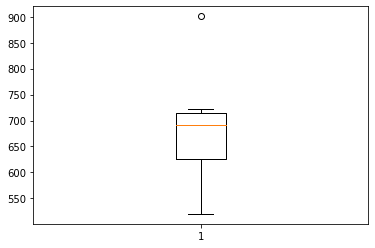

In [32]:
plt.boxplot(df['performance_score'])
plt.show()

In [33]:
df.shape

(8, 6)

## Check the gender column and do Dummy encoding.

In [34]:
df['gender'].value_counts()

F    6
M    2
Name: gender, dtype: int64

In [35]:
pd.get_dummies(df,columns=['gender'],drop_first=True)

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45.000000,52857.142857,Operations,G3,723,0
S Kumar,40.428571,16000.000000,Finance,G0,520,0
Jack Morgan,32.000000,35000.000000,Finance,G2,674,1
Ying Chin,45.000000,65000.000000,Sales,G3,556,0
Dheeraj Patel,30.000000,42000.000000,Operations,G2,711,0
Satyam Sharma,40.428571,62000.000000,Sales,G3,649,0
Josh Wills,54.000000,52000.000000,Finance,G3,901,0
Leo Duck,23.000000,98000.000000,Sales,G4,709,1


## Do the standard scaling on the feature performance score.

In [36]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [37]:
sc=StandardScaler()
df['performance_score']=sc.fit_transform(df[['performance_score']])
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52857.142857,F,Operations,G3,0.392262
S Kumar,40.428571,16000.000000,F,Finance,G0,-1.475872
Jack Morgan,32.000000,35000.000000,M,Finance,G2,-0.058667
Ying Chin,45.000000,65000.000000,F,Sales,G3,-1.144578
Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,0.281831
Satyam Sharma,40.428571,62000.000000,F,Sales,G3,-0.288733
Josh Wills,54.000000,52000.000000,F,Finance,G3,2.030331
Leo Duck,23.000000,98000.000000,M,Sales,G4,0.263425


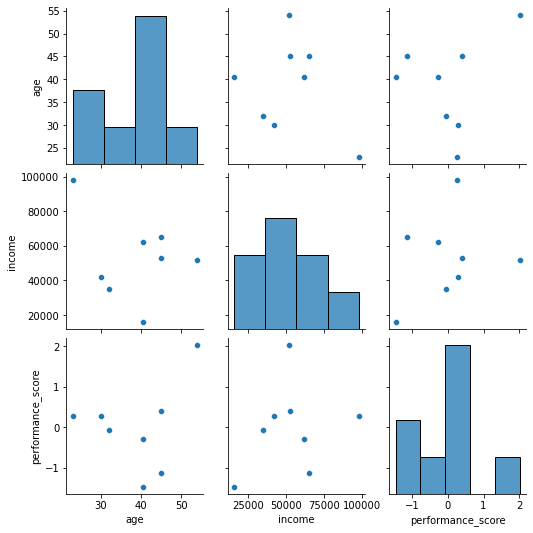

In [38]:
sns.pairplot(data=df)